In [ ]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [ ]:
df.tail()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0

In [ ]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [ ]:
df.shape

(4238, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
missing_values = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100)
}).sort_values(by='Missing Count', ascending=False)

print(missing_values)

                 Missing Count  Missing Percentage
glucose                    388            9.155262
education                  105            2.477584
BPMeds                      53            1.250590
totChol                     50            1.179802
cigsPerDay                  29            0.684285
BMI                         19            0.448325
heartRate                    1            0.023596
male                         0            0.000000
age                          0            0.000000
currentSmoker                0            0.000000
prevalentStroke              0            0.000000
prevalentHyp                 0            0.000000
diabetes                     0            0.000000
sysBP                        0            0.000000
diaBP                        0            0.000000
TenYearCHD                   0            0.000000


In [ ]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

education: 0.0248% missing values
cigsPerDay: 0.0068% missing values
BPMeds: 0.0125% missing values
totChol: 0.0118% missing values
BMI: 0.0045% missing values
glucose: 0.0916% missing values


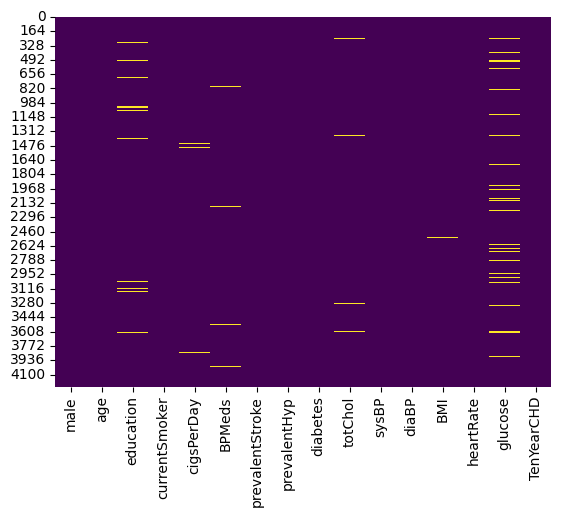

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
df = df.drop(['education'], axis=1)

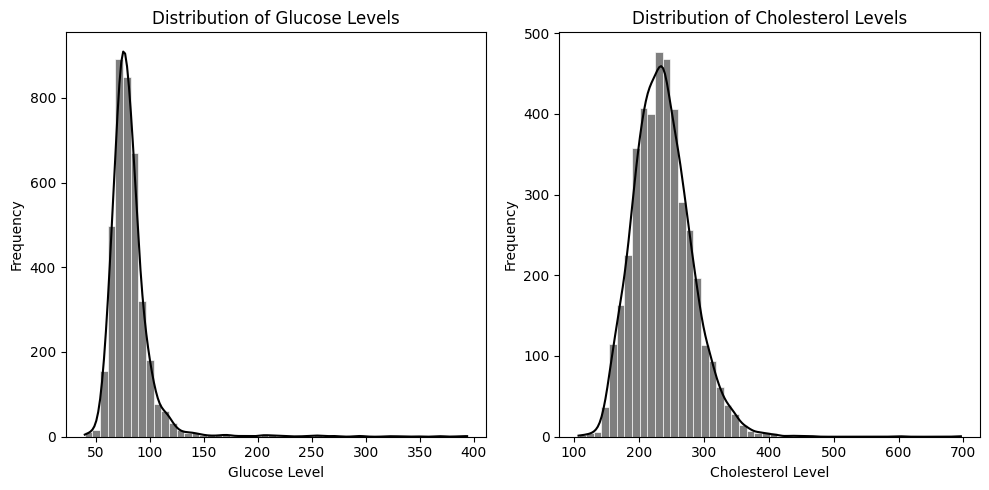

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First histogram: Glucose Levels
sns.histplot(df['glucose'], kde=True, bins=50, edgecolor='white', color='black', ax=axes[0])
axes[0].set_xlabel("Glucose Level")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Glucose Levels")

# Second histogram: Cholesterol Levels
sns.histplot(df['totChol'], kde=True, bins=50, edgecolor='white', color='black', ax=axes[1])
axes[1].set_xlabel("Cholesterol Level")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Cholesterol Levels")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:

df.fillna({'glucose': df['glucose'].mean()}, inplace=True)

In [ ]:

df.fillna({'totChol': df['totChol'].mean()}, inplace=True)

df.loc[(df['cigsPerDay'].isnull()) & (df['currentSmoker'] == 1), 'cigsPerDay'] = df['cigsPerDay'].median()
df.fillna({'cigsPerDay': 0}, inplace=True)


df.fillna({'BPMeds': 0}, inplace=True)


df.fillna({'BMI': df['BMI'].median()}, inplace=True)


df.fillna({'heartRate': df['heartRate'].median()}, inplace=True)

In [ ]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

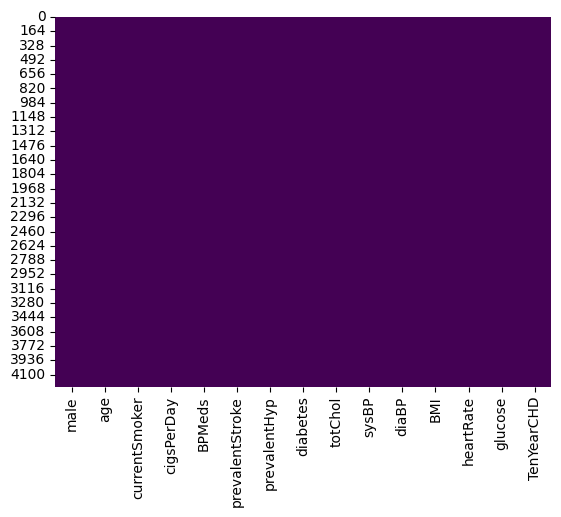

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
df.describe()

male          age  currentSmoker   cigsPerDay       BPMeds  \
count  4238.000000  4238.000000    4238.000000  4238.000000  4238.000000   
mean      0.429212    49.584946       0.494101     9.003089     0.029259   
std       0.495022     8.572160       0.500024    11.879230     0.168552   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      4238.000000   4238.000000  4238.000000  4238.000000  4238.000000   
mean          0.005899      0.310524     0.025720   236.721585   132.352407   
std           0.076587      0.462763     0.158316    44.326453    22.038097   
min           0.000000      0.000000     0.000000   107.000000    83.500000   
25%           0.000000      0.000000     0.000000   206.000000   117.000000   
50%           0.000000      0.000000     0.000000   234.000000   128.000000   
75%           0.000000      1.000000     0.000000   262.000000   144.000000   
max           1.000000      1.000000     1.000000   696.000000   295.000000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000  
mean     82.893464    25.802008    75.878924    81.966753     0.151958  
std      11.910850     4.070953    12.025177    22.836603     0.359023  
min      48.000000    15.540000    44.000000    40.000000     0.000000  
25%      75.000000    23.080000    68.000000    72.000000     0.000000  
50%      82.000000    25.410000    75.000000    80.000000     0.000000  
75%      89.875000    28.037500    83.000000    85.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [ ]:
df.shape

(4238, 15)

In [ ]:
df.duplicated().sum()

0

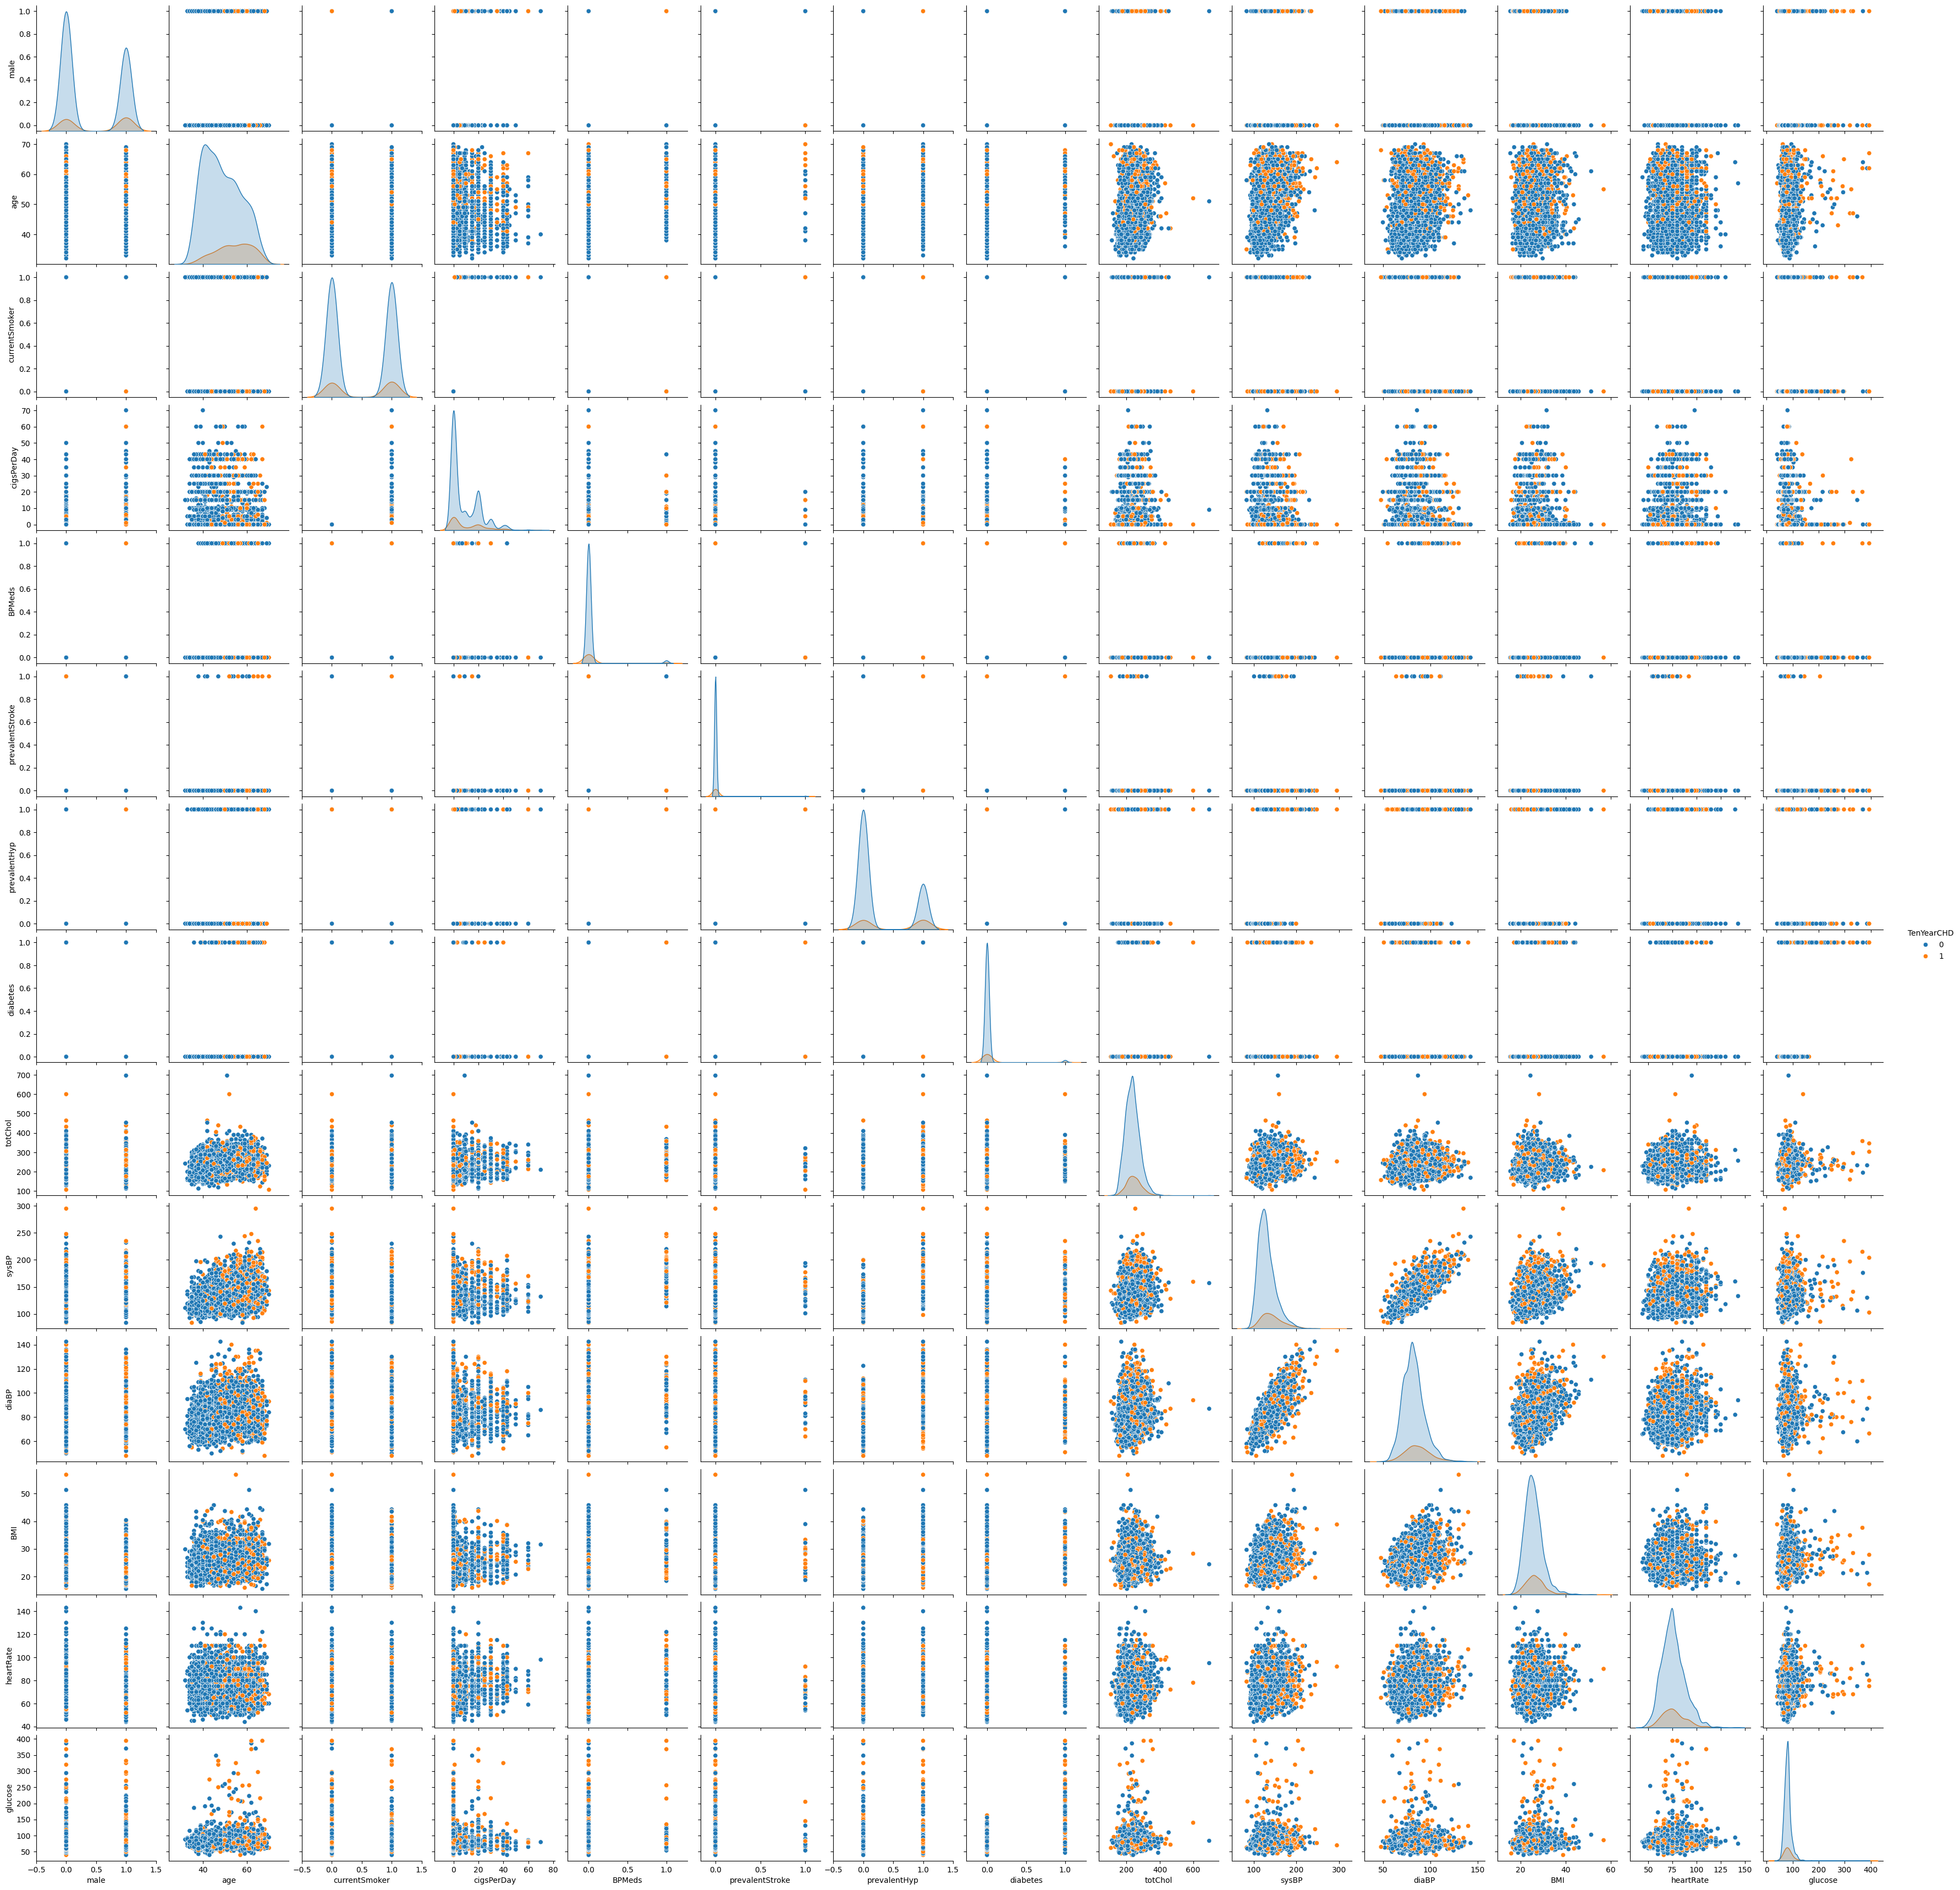

In [ ]:
sns.pairplot(df, hue='TenYearCHD')

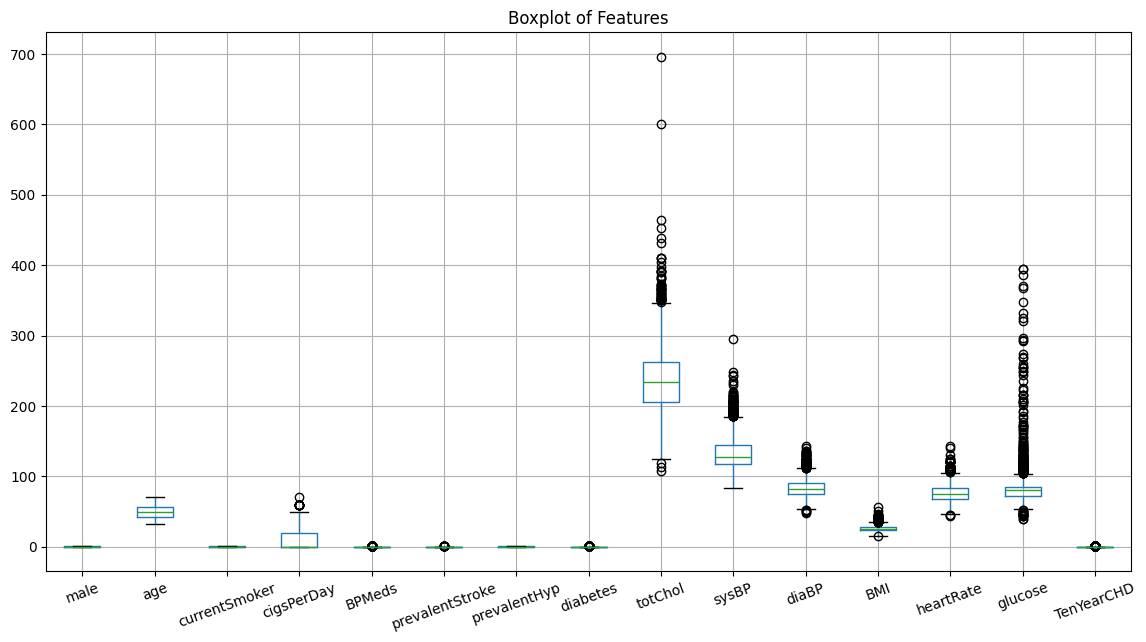

In [ ]:
plt.figure(figsize=(14, 7))
df.boxplot(rot=90)
plt.title("Boxplot of Features")
plt.xticks(rotation=20)
plt.show()

In [ ]:
df.corr()

male       age  currentSmoker  cigsPerDay    BPMeds  \
male             1.000000 -0.028979       0.197596    0.316807 -0.051545   
age             -0.028979  1.000000      -0.213748   -0.192366  0.120955   
currentSmoker    0.197596 -0.213748       1.000000    0.766970 -0.048358   
cigsPerDay       0.316807 -0.192366       0.766970    1.000000 -0.045663   
BPMeds          -0.051545  0.120955      -0.048358   -0.045663  1.000000   
prevalentStroke -0.004546  0.057655      -0.032988   -0.032706  0.114609   
prevalentHyp     0.005313  0.307194      -0.103260   -0.065947  0.258697   
diabetes         0.015708  0.101258      -0.044295   -0.037063  0.051394   
totChol         -0.069974  0.260270      -0.046285   -0.026025  0.078712   
sysBP           -0.035989  0.394302      -0.130230   -0.088505  0.251503   
diaBP            0.057933  0.206104      -0.107746   -0.056391  0.192356   
BMI              0.081506  0.135283      -0.167276   -0.092453  0.099647   
heartRate       -0.116601 -0.012819       0.062348    0.074851  0.015139   
glucose          0.005818  0.116850      -0.054157   -0.056088  0.048856   
TenYearCHD       0.088428  0.225256       0.019456    0.057775  0.086417   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
male                   -0.004546      0.005313  0.015708 -0.069974 -0.035989   
age                     0.057655      0.307194  0.101258  0.260270  0.394302   
currentSmoker          -0.032988     -0.103260 -0.044295 -0.046285 -0.130230   
cigsPerDay             -0.032706     -0.065947 -0.037063 -0.026025 -0.088505   
BPMeds                  0.114609      0.258697  0.051394  0.078712  0.251503   
prevalentStroke         1.000000      0.074830  0.006949  0.000067  0.057009   
prevalentHyp            0.074830      1.000000  0.077808  0.163041  0.696755   
diabetes                0.006949      0.077808  1.000000  0.040092  0.111283   
totChol                 0.000067      0.163041  0.040092  1.000000  0.207609   
sysBP                   0.057009      0.696755  0.111283  0.207609  1.000000   
diaBP                   0.045190      0.615751  0.050329  0.163903  0.784002   
BMI                     0.024840      0.300572  0.086250  0.114789  0.325247   
heartRate              -0.017676      0.147222  0.048993  0.090676  0.182174   
glucose                 0.018055      0.082924  0.605705  0.044583  0.134608   
TenYearCHD              0.061810      0.177603  0.097317  0.081624  0.216429   

                    diaBP       BMI  heartRate   glucose  TenYearCHD  
male             0.057933  0.081506  -0.116601  0.005818    0.088428  
age              0.206104  0.135283  -0.012819  0.116850    0.225256  
currentSmoker   -0.107746 -0.167276   0.062348 -0.054157    0.019456  
cigsPerDay      -0.056391 -0.092453   0.074851 -0.056088    0.057775  
BPMeds           0.192356  0.099647   0.015139  0.048856    0.086417  
prevalentStroke  0.045190  0.024840  -0.017676  0.018055    0.061810  
prevalentHyp     0.615751  0.300572   0.147222  0.082924    0.177603  
diabetes         0.050329  0.086250   0.048993  0.605705    0.097317  
totChol          0.163903  0.114789   0.090676  0.044583    0.081624  
sysBP            0.784002  0.325247   0.182174  0.134608    0.216429  
diaBP            1.000000  0.376544   0.181246  0.058647    0.145299  
BMI              0.376544  1.000000   0.067544  0.082109    0.074680  
heartRate        0.181246  0.067544   1.000000  0.089341    0.022898  
glucose          0.058647  0.082109   0.089341  1.000000    0.120406  
TenYearCHD       0.145299  0.074680   0.022898  0.120406    1.000000

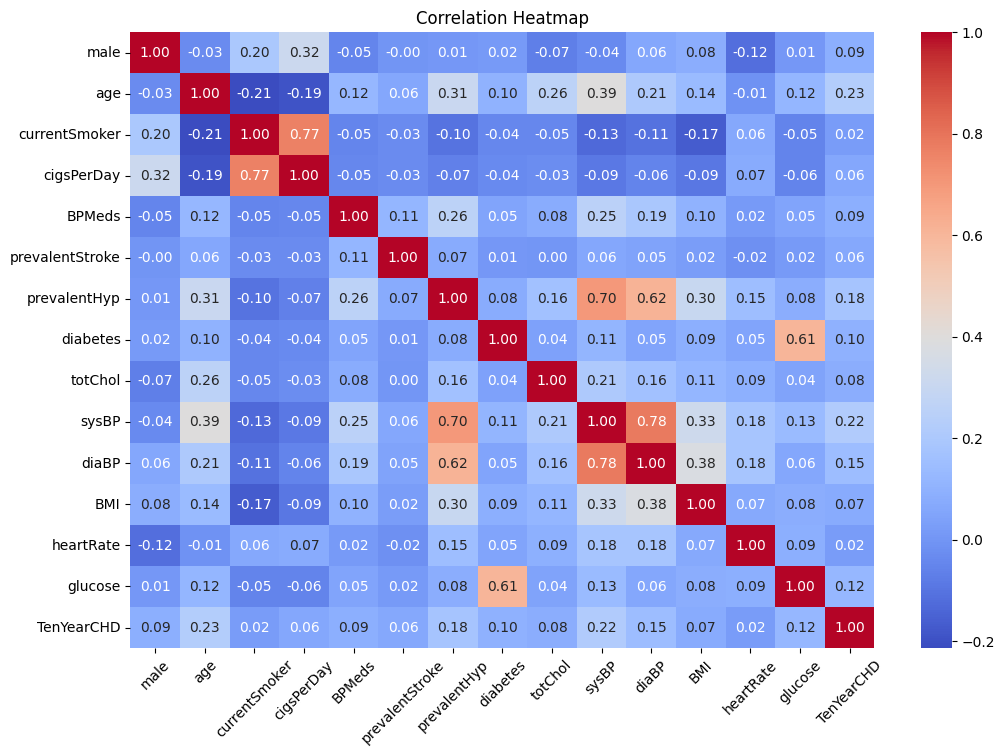

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr = df.corr()
target_corr = corr["TenYearCHD"].sort_values(ascending=False)
target_corr

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.120406
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol            0.081624
BMI                0.074680
prevalentStroke    0.061810
cigsPerDay         0.057775
heartRate          0.022898
currentSmoker      0.019456
Name: TenYearCHD, dtype: float64

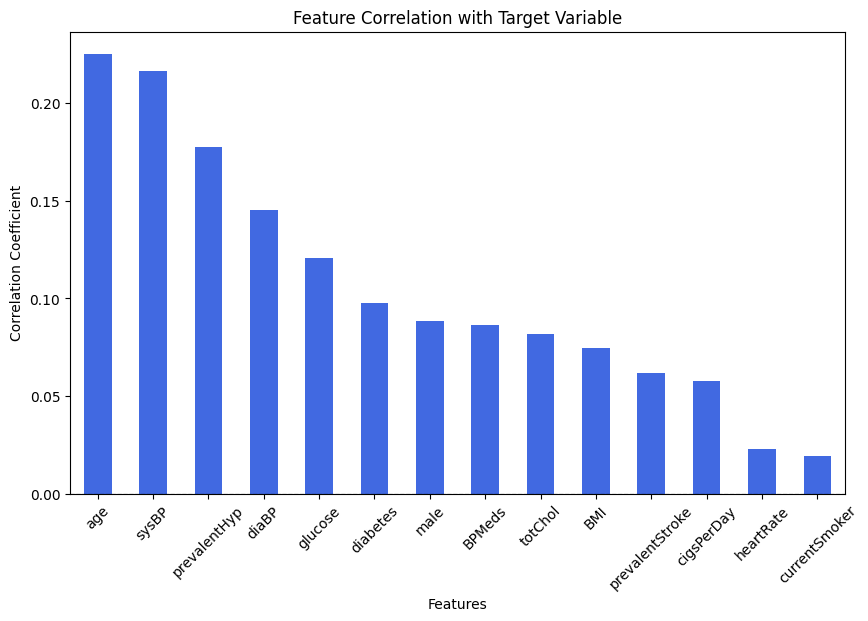

In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 6))
target_corr.drop("TenYearCHD").plot(kind="bar", color="royalblue")  # Remove self-correlation
plt.title("Feature Correlation with Target Variable")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add zero correlation line
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = df.drop(['heartRate', 'currentSmoker'], axis=1)

In [ ]:
df["age_sysBP"] = df["age"] * df["sysBP"]

In [ ]:
feature_columns = ['age', 'sysBP', 'prevalentHyp', 'diaBP', 'glucose', 'diabetes', 'age_sysBP']  # Add all relevant features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_columns]), columns=feature_columns)

# Add back the target column
df_scaled['TenYearCHD'] = df['TenYearCHD'].values

# Check if age_sysBP exists
print(df_scaled.columns)

Index(['age', 'sysBP', 'prevalentHyp', 'diaBP', 'glucose', 'diabetes',
       'age_sysBP', 'TenYearCHD'],
      dtype='object')


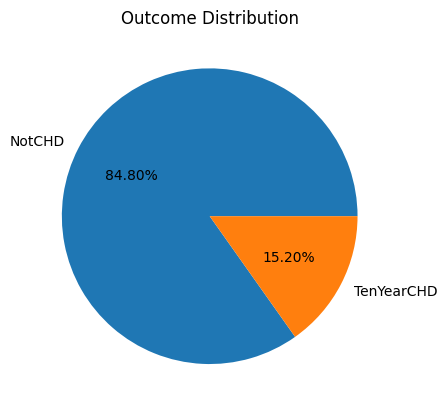

In [ ]:
plt.pie(df.TenYearCHD.value_counts(), labels=['NotCHD', 'TenYearCHD'], autopct='%1.2f%%')
plt.title('Outcome Distribution')
plt.show()

In [ ]:
df_scaled

age     sysBP  prevalentHyp     diaBP   glucose  diabetes  \
0    -1.234951 -1.195907     -0.671101 -1.082625 -0.217517 -0.162477   
1    -0.418257 -0.515187     -0.671101 -0.158988 -0.261311 -0.162477   
2    -0.184916 -0.220209     -0.671101 -0.242955 -0.524078 -0.162477   
3     1.331800  0.800871      1.490089  1.016549  0.921141 -0.162477   
4    -0.418257 -0.106755     -0.671101  0.092912  0.132840 -0.162477   
...        ...       ...           ...       ...       ...       ...   
4233  0.048425  2.116930      1.490089  0.764648  0.176634 -0.162477   
4234  0.165095 -0.265590     -0.671101 -0.242955 -0.611667 -0.162477   
4235 -0.184916 -0.061374     -0.671101 -0.914691  0.176634 -0.162477   
4236 -0.651598 -0.265590     -0.671101  0.344813  0.000000 -0.162477   
4237  0.281766  0.052079     -0.671101  0.008946  1.096319 -0.162477   

      age_sysBP  TenYearCHD  
0     -1.303148           0  
1     -0.557647           0  
2     -0.269233           0  
3      1.308189           1  
4     -0.342118           0  
...         ...         ...  
4233   1.204068           1  
4234  -0.096654           0  
4235  -0.181772           0  
4236  -0.557647           0  
4237   0.158701           0  

[4238 rows x 8 columns]

In [ ]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy=0.5, random_state=19)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 3594, 1: 1797})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Precision Score:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))

Accuracy: 0.5719339622641509
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.62      0.71       721
           1       0.13      0.31      0.18       127

    accuracy                           0.57       848
   macro avg       0.48      0.47      0.45       848
weighted avg       0.73      0.57      0.63       848

Confusion Matrix:
 [[445 276]
 [ 87  40]]
Precision Score: 0.12658227848101267
Recall: 0.31496062992125984


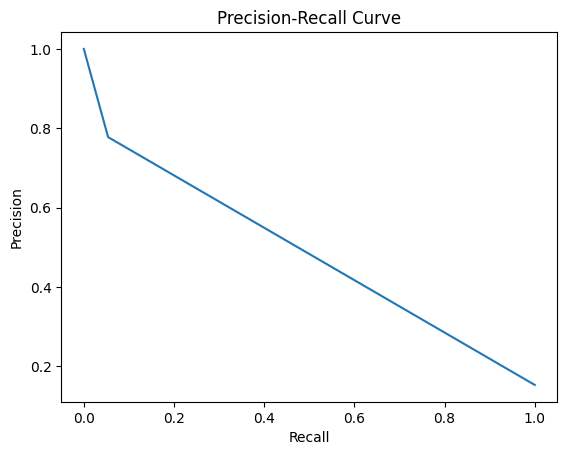

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
X_test

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
411      0   60              0         0.0     0.0                0   
3966     1   64              0         0.0     0.0                0   
2833     0   43              1         1.0     0.0                0   
3575     1   56              1        20.0     0.0                0   
1949     0   46              0         0.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
1511     0   38              0         0.0     0.0                0   
3344     1   47              1        30.0     0.0                0   
129      0   41              0         0.0     0.0                0   
2159     0   42              1        15.0     0.0                0   
1824     1   57              1         1.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
411              1         0    285.0  156.0  100.0  23.02       80.0     85.0  
3966             0         0    263.0  102.5   63.5  28.82       64.0     99.0  
2833             0         0    185.0  125.0   84.0  23.18       75.0     55.0  
3575             0         0    186.0  116.0   67.0  24.62       70.0     83.0  
1949             0         0    295.0  145.0   90.0  25.87       90.0     79.0  
...            ...       ...      ...    ...    ...    ...        ...      ...  
1511             0         0    255.0  125.0   85.0  23.05       72.0     73.0  
3344             1         0    190.0  147.5   92.5  31.31       77.0     82.0  
129              0         0    213.0  112.0   73.0  24.81       62.0     74.0  
2159             0         0    212.0  115.0   72.0  23.72       73.0    100.0  
1824             0         0    245.0  122.0   69.0  24.17       65.0     92.0  

[750 rows x 14 columns]

In [ ]:
positive_cases = X_test[Y_test == 1]
positive_cases.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
2958     1   54              0         0.0     0.0                0   
2576     1   40              1        20.0     0.0                0   
1093     1   43              1        40.0     0.0                0   
3678     1   48              1        35.0     0.0                0   
840      0   59              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
2958             1         0    180.0  147.5  100.0  25.11       70.0     70.0  
2576             0         0    275.0  112.5   85.0  28.04       73.0     71.0  
1093             0         0    263.0  114.0   81.0  25.68       70.0     74.0  
3678             0         0    263.0  132.0   91.0  40.08       90.0     91.0  
840              0         0    241.0  120.0   73.0  23.76       60.0     88.0

In [ ]:
negative_cases = X_test[Y_test == 0]
negative_cases.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
411      0   60              0         0.0     0.0                0   
3966     1   64              0         0.0     0.0                0   
2833     0   43              1         1.0     0.0                0   
3575     1   56              1        20.0     0.0                0   
1949     0   46              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
411              1         0    285.0  156.0  100.0  23.02       80.0     85.0  
3966             0         0    263.0  102.5   63.5  28.82       64.0     99.0  
2833             0         0    185.0  125.0   84.0  23.18       75.0     55.0  
3575             0         0    186.0  116.0   67.0  24.62       70.0     83.0  
1949             0         0    295.0  145.0   90.0  25.87       90.0     79.0

In [ ]:
new_data = pd.DataFrame({
    'male': [1],
    'age': [54],
    'currentSmoker': [1],
    'cigsPerDay': [35],
    'BPMeds': [0],
    'prevalentStroke': [0],
    'prevalentHyp': [0],
    'diabetes': [0],
    'totChol': [263],
    'sysBP': [132],
    'diaBP': [91],
    'BMI': [40.08],
    'heartRate': [70],
    'glucose': [70]
})  # Replace with actual features


In [ ]:
prediction = model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0]
